# Quick recap - handling different types of data
- Numerical data: Numerical data is any data where data points are exact numbers. Numerical data can be characterized by:
  - continuous data - continuous data can assume any value within a range
  - discrete data - discrete data has distinct values.
- Categorical data: represents characteristics, such as a hockey player’s position, team, hometown. https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html
- Time series data: it is a sequence of numbers collected at regular intervals over some period of time. Time series data has a temporal value attached to it, so this would be something like a date or a timestamp that you can look for trends in time.
- Text: it is basically just words.
- Images:
  - grayscale: matrix of numbers with values 0-255
  - usually RGB, 3 matrices of numbers of the same size nxm, values 0-255







# Dimensionality reduction

"Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only do all these features make training extremely slow, but they can also make it much harder to find a good solution. This problem is often referred to as the curse of dimensionality."
Source: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition


Fortunately, we can reduce those dimensions, for example for MNIST images, we can drop completely these pixels white pixels on the edges from the training set without losing much information (they are unimportant for the classification task). Next, two neighboring pixels are often highly correlated: if we merge them into a single pixel (e.g., by taking the mean of the two pixel intensities), we will not lose much information.

Another usage of dimensionality reduction, except of making training easier, is to use it for plotting. If we could reduce the dims to 2 or 3, whe could easily plot them.

We can distinguish 2 techniques:
- Projection: projecting higher dimensional space to lower dimensional space
- Manifold learning: learning to model a manifold (d dimensional shape that can be bent in higher dimensional space n, where d < n) Read more: https://scikit-learn.org/stable/modules/manifold.html

## PCA
PCA algorithm first identifies the hyperplane that lies closest to the data, and then it projects the data onto it. In each step it selects the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [3]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

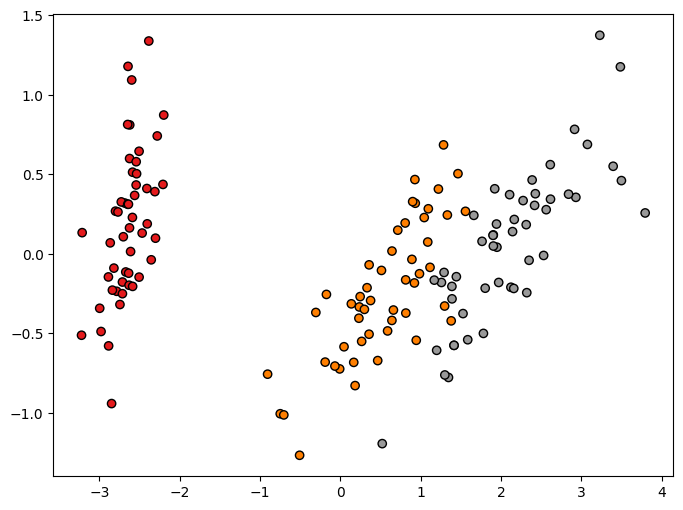

In [4]:
import matplotlib.pyplot as plt

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X2D[:, 0], X2D[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")

In [5]:
# This ratio indicates the proportion of the dataset’s variance that lies along each principal component.
pca.explained_variance_ratio_
# This output tells us that 92.4% of the dataset’s variance lies along the first PC, and 5.3% lies along the second PC

array([0.92461872, 0.05306648])

### Choosing the best number of dimensions
Instead of arbitrarily choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).

In [6]:

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

2


In [7]:
# or we can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

## Different types of PCA
- Randomized PCA https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.RandomizedPCA.html
- Incremental PCA (it splits the dataset into batches, so we do not need the entire dataset at once) https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html
- Kernel PCA (Kernel trick will be discussed later) a mathematical technique that implicitly maps instances into a very high-dimensional space (called the feature space), enabling nonlinear classification and regression. The same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction.

In [8]:
# Load MNIST
from sklearn import datasets
digits = datasets.load_digits()
MNIST_X, MNIST_Y = digits.data, digits.target

In [9]:
MNIST_X, MNIST_Y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [10]:
# Randomized PCA
rnd_pca = PCA(n_components=10, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(MNIST_X)

In [11]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA

n_batches = 20
inc_pca = IncrementalPCA(n_components=10)
for X_batch in np.array_split(MNIST_X, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(MNIST_X)

In [12]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 10, kernel="rbf", gamma=0.03)
X_reduced = rbf_pca.fit_transform(MNIST_X)

## Manifold
Manifold Learning can be thought of as an attempt to generalize linear frameworks like PCA to be sensitive to non-linear structure in data. It learns the high-dimensional structure of the data from the data itself, without the use of predetermined classifications. It does not rely on projections.  
https://scikit-learn.org/stable/modules/manifold.html

### LLE

It is a nonlinear dimensionality reduction (NLDR) technique, it works by first measuring how each training instance linearly relates to its closest neighbors, and then looking for a low-dimensional representation of the training set where these local relationships are best preserved.

In [13]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=10, n_neighbors=10)
X_reduced = lle.fit_transform(MNIST_X)

Please follow to this Scikit tutorial and follow the steps for MNIST https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

# Task (10 points) 5 for clustering and 5 for dimensionality reduction
1. Download Fashion MNIST dataset from here https://www.kaggle.com/datasets/zalando-research/fashionmnist
2. Analyze the data, (ofc get rid of target column :) )
3. Do dimensionality reduction (choose the best dimension that does not loose to much of data - explain why)
4. Perform clustering to find if we can find similar images (similar products)
5. Prepare a short presentation with your findings and complete process with each decision described in a few sentences. (Why such dim reduction algorithm, how you chose the number of dimensions that you reduced to, compare different clustering algorithms, try to find a hierarchy of products using hierarchical clustering)
6. Based on the target labels, how good your clustering is? (choose a metric and argument why it is better then other metrics)
7. Based on the data points, how well your clusters are shaped? (Silhoutette score, etc.)

In [14]:
!unzip '/content/archive.zip'

Archive:  /content/archive.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('/content/fashion-mnist_train.csv')

<Axes: ylabel='label'>

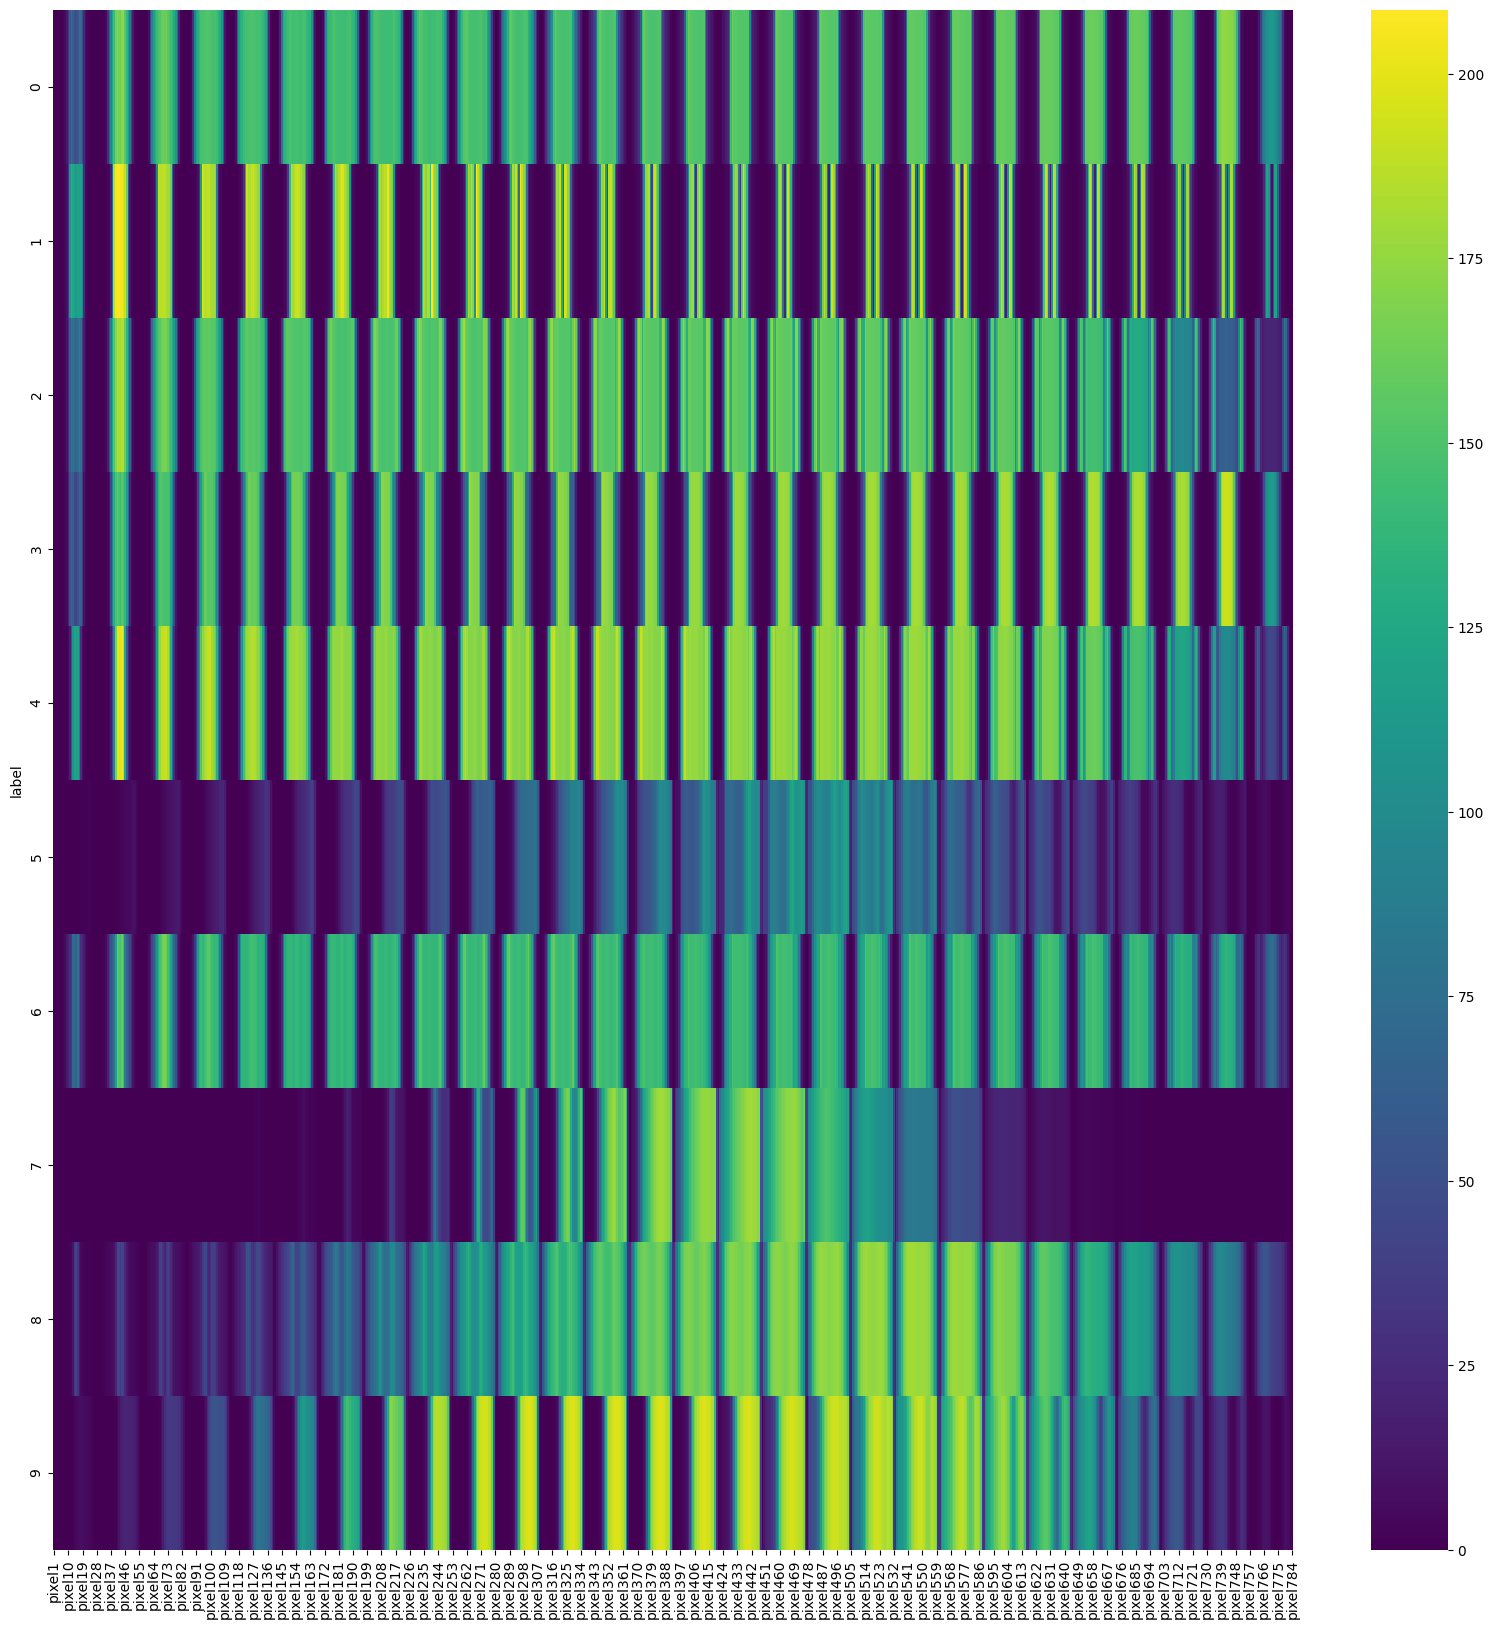

In [21]:
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(df.groupby('label').mean(), cmap='viridis')


In [38]:
# make dim recuction with autoencoder in pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32),
            nn.ReLU(True),
            nn.Linear(32, 20)
        )
        self.decoder = nn.Sequential(
            nn.Linear(20, 32),
            nn.ReLU(True),
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 784),
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# make dataset from pandas dataframe (columns are pixel values)

class DatasetMNIST(Dataset):
    def __init__(self, df):
        self.df = df
        self.data = df.drop('label', axis=1).values
        self.label = df['label'].values

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        return self.data[idx], self.label[idx]

train_dataset = DatasetMNIST(df)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# train model
num_epochs = 15
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = img.type(torch.float32)
        recon = model(img)
        loss = criterion(recon, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/15], loss:2070.5056
epoch [2/15], loss:1616.9711
epoch [3/15], loss:1484.7603
epoch [4/15], loss:1430.7295
epoch [5/15], loss:1396.2554
epoch [6/15], loss:1378.6083
epoch [7/15], loss:1370.4437
epoch [8/15], loss:1225.4617
epoch [9/15], loss:1054.0715
epoch [10/15], loss:1324.3459
epoch [11/15], loss:1095.8584
epoch [12/15], loss:1071.1055
epoch [13/15], loss:1158.9286
epoch [14/15], loss:1232.0752
epoch [15/15], loss:1010.1844


In [57]:
latent_space = model.encoder(torch.tensor(df.drop('label', axis=1).values).float())

df_latent = pd.DataFrame(latent_space.detach().numpy())
df_latent['label'] = df['label']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='3', ylabel='4'>

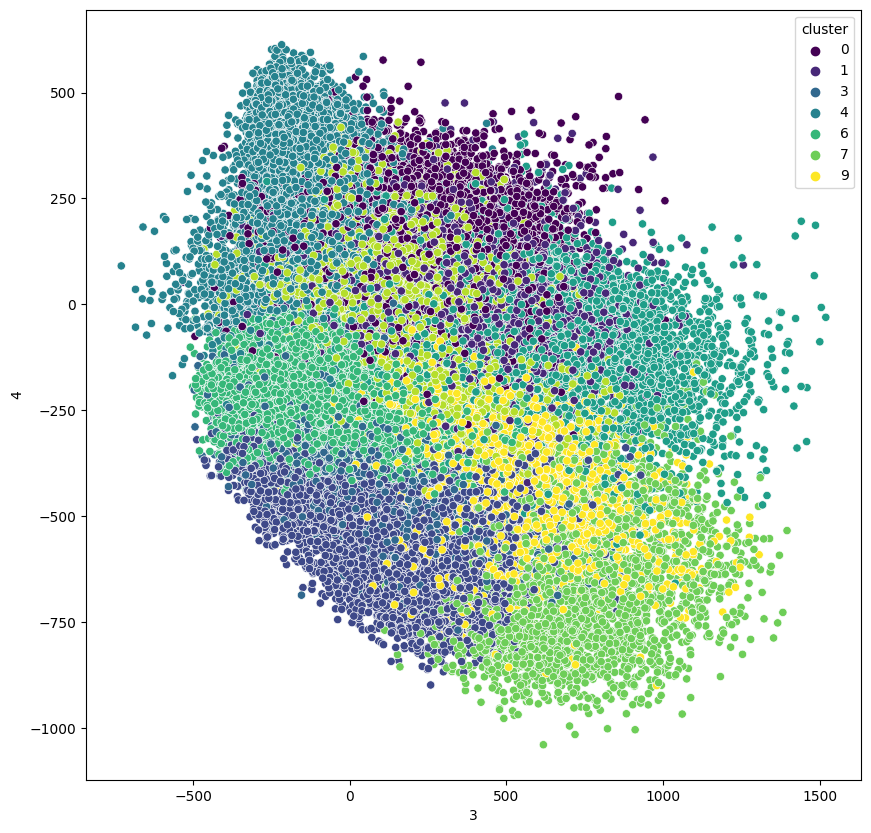

In [58]:
# cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)

# fit and predict
kmeans.fit(df_latent.drop('label', axis=1))
df_latent['cluster'] = kmeans.predict(df_latent.drop('label', axis=1))

# plot clusters with scatter plot

plt.figure(figsize=(10, 10))
sns.scatterplot(x=df_latent[3], y=df_latent[4], hue=df_latent['cluster'], palette='viridis')

In [69]:
df_cluster_label = pd.DataFrame({'cluster': df_pca['cluster'], 'label': df_pca['label']})

# choose the most frequent cluster for each label
df_cluster_label = df_cluster_label.groupby('label').agg(lambda x:x.value_counts().index[0])

# make dictionary with label as a key and cluster as a value
label_cluster_dict = df_cluster_label.to_dict()['cluster']

In [70]:
label_cluster_dict

{0: 5, 1: 2, 2: 1, 3: 2, 4: 1, 5: 6, 6: 4, 7: 0, 8: 8, 9: 3}

In [72]:
from sklearn.metrics import accuracy_score

df_latent['predicted_label'] = df_latent['cluster'].map(label_cluster_dict)
# calculate accuracy
accuracy_score(df_latent['label'], df_latent['predicted_label'])


0.1513

Wykorzystałam autoenkoder do zmniejszenia wymiarowości danych: sieć powinna nauczyć się kodowania do mniejszej przestrzeni i odkodowania do oryginalnego wektora.

Jako metrykę wykorzystałam accuracy: predykcja została zmapowana na najczęściej występujący klaster.

Wynik jest daleko od idealnego, autoenkoder wymaga większego dotunowania, aby poprawnie rekonstruować obrazy.